In [1]:
import numpy as np
import matplotlib.pyplot as plt

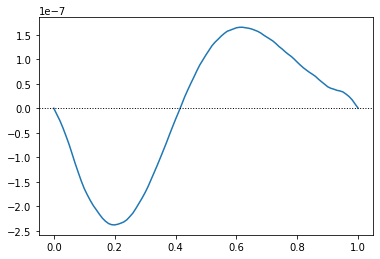

In [16]:
L = 1
d = 0.1 # hitting point
C = 1
sgm = 0.3
v = 100

N = 100
a = L/N
h = 1e-6
eta = h*(v/a)**2

x = np.arange(0, L+0.001*a, a)
psi = C*x*(L-x)/L**2 * np.exp(-0.5*(x-d)**2/sgm**2)
psi_new = np.zeros_like(psi)
phi = np.zeros_like(psi)
phi_new = np.zeros_like(phi)

t = 0
tmax = 0.02 + 0.001 * h

while t < tmax:
    phi_new = phi + h*psi
    psi_new[1:-1] = psi[1:-1] + eta*(phi[2:] + phi[:-2] - 2*phi[1:-1])
    phi,phi_new = phi_new, phi
    psi, psi_new = psi_new, psi
    t += h
    
plt.plot(x, phi)
plt.axhline(c='k', ls = ':', lw=1)

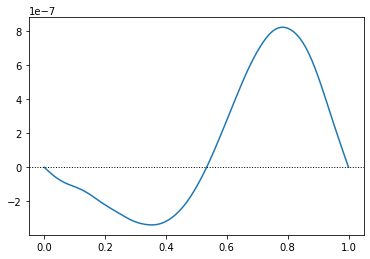

In [19]:
eta = h*(v/a)**2

Leven = np.array([0, 0, 1, -0.5*h, 0])
Lodd  = np.array([-0.5*eta,0, eta, 1, -0.5*eta])
Reven = np.array([0, 0, 1, 0.5*h, 0])
Rodd  = np.array([0.5*eta, 0, -eta, 1, 0.5*eta])

A = np.zeros((2*N-2, 2*N-2))
B = np.zeros_like(A)

index = np.arange(1, N-2) # 1 ~ N-3
#even: phi, odd: psi
A[0, :3]   = Leven[2:] # A[0, 0,1,2] = [1, -0.5*h, 0] ; n=0
A[1, :3]   = Lodd[2:]  # A[1, 0,1,2] = [eta, 1, -0.5*eta] ; n=0
A[-2, -4:] = Leven[:4] # A[2*N-4, 2*N-6,5,4,3] = [0, 0, 1, -0.5*h] ; n=N-2
A[-1, -4:] = Lodd[:4]  # A[2*N-3, 2*N-6,5,4,3] = [0.5*eta, 0, -eta, 1] ; n=N-2
B[0, :3]   = Reven[2:]
B[1, :3]   = Rodd[2:]
B[-2, -4:] = Reven[:4]
B[-1, -4:] = Rodd[:4]
for i in index: # Ax(t+h) = Bx(t)
    A[2*i,   2*i-2:2*i+3] = Leven
    A[2*i+1, 2*i-2:2*i+3] = Lodd
    B[2*i,   2*i-2:2*i+3] = Reven
    B[2*i+1, 2*i-2:2*i+3] = Rodd
    
x = np.arange(0, L+0.001*a, a)
psi = C*x*(L-x)/L**2 * np.exp(-0.5*(x-d)**2/sgm**2)
phi = np.zeros_like(psi)
pv = np.zeros(2*N-2)
pv[1::2] = psi[1:-1]

t = 0
tmax = 0.05 + 0.001 * h

while t < tmax:
    pv = np.dot(B, pv)
    pv = np.linalg.solve(A, pv)
    t += h
phi[1:-1] = pv[0::2]
plt.plot(x, phi)
plt.axhline(c='k', ls = ':', lw=1)